In [1]:
import random
import numpy as np
import cv2
from keras.models import Sequential 
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D 
from keras.layers import LSTM 
from keras.layers import Dense 
from keras.layers import Flatten 
from keras.layers import TimeDistributed

In [3]:
size = 30

In [5]:
# generate the next frame in the sequence 
def next_frame(last_step, column, size): 
    frame = np.zeros((size,size)) 
    # define the scope of the next step 
    lower = max(0, last_step-3) 
    upper = min(frame.shape[0]-1, last_step+3) 
    # choose the row index for the next step 
    step = random.randint(lower, upper) 
    # add the new step 
    cv2.circle(frame,(column, step),3,255,-1)
    #frame[step, column] = 1 
    return frame, step

In [7]:
# generate a sequence of frames of a dot moving across an image 
def build_frames(size): 
    frames = list() 

    step = random.randint(0, size-1) 
    # decide if we are heading left or right 
    right = 1 if random.random() < 0.5 else 0 
    col = 0 if right else size-1 

    # create all frames 
    for i in range(0, size): 
        col = i if right else size-1-i 
        frame, step = next_frame(step, col, size) 
        frames.append(frame) 
    return frames, right

In [9]:
# generate multiple sequences of frames and reshape for network input 
def generate_examples(size, n_patterns): 
    X, y = list(), list() 
    for _ in range(n_patterns): 
        frames, right = build_frames(size) 
        X.append(frames) 
        y.append(right) 
    # resize as [samples, timesteps, width, height, channels] 
    X = np.array(X).reshape(n_patterns, size, size, size, 1)
    y = np.array(y).reshape(n_patterns, 1) 
    return X, y

<-- Left


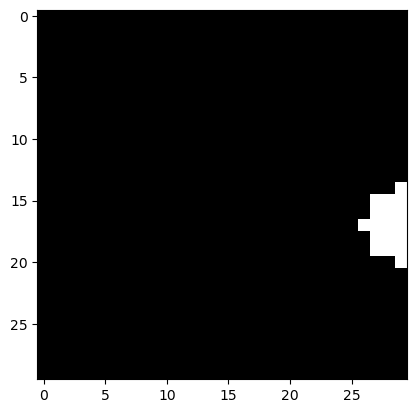

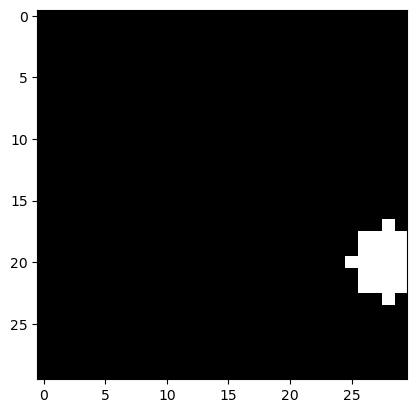

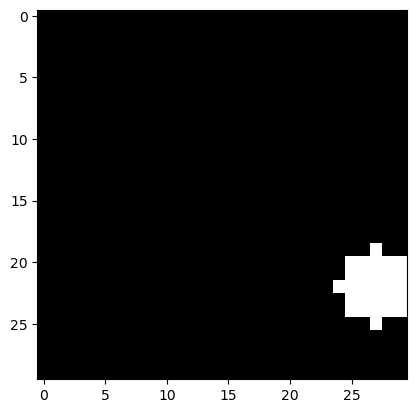

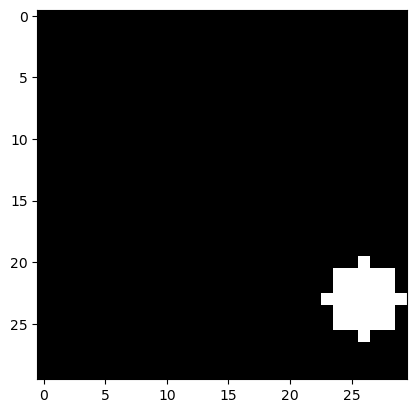

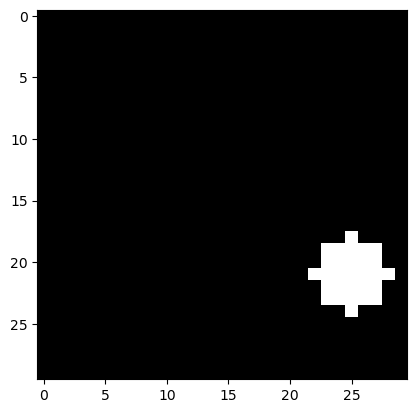

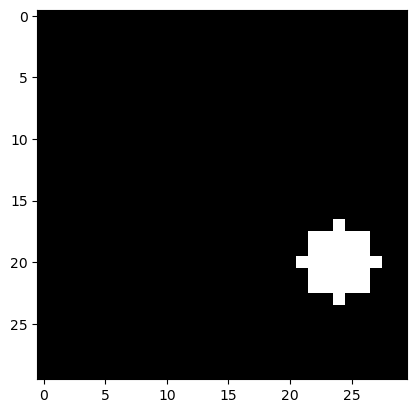

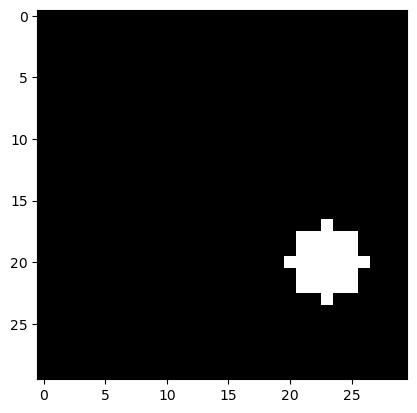

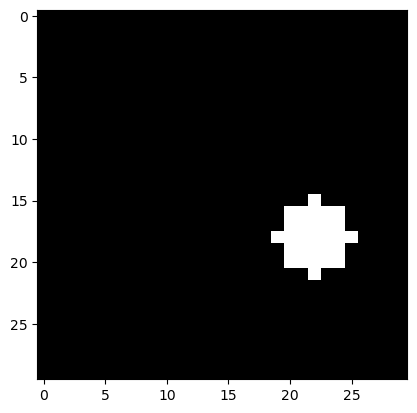

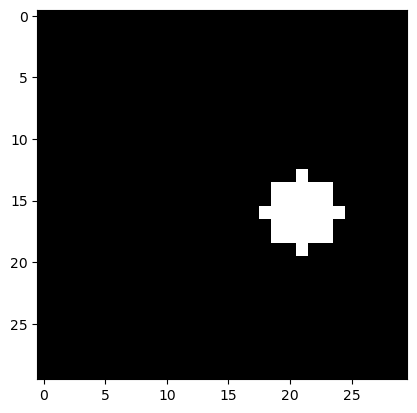

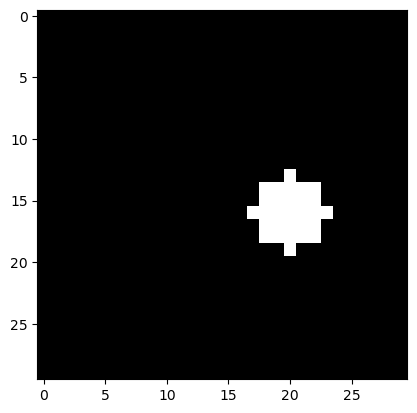

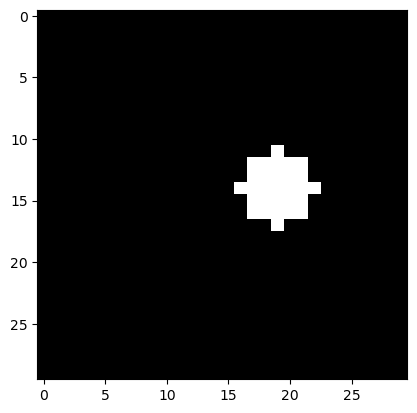

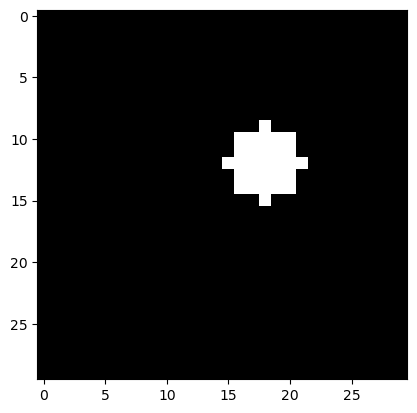

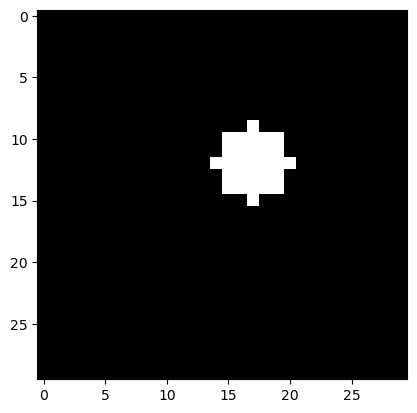

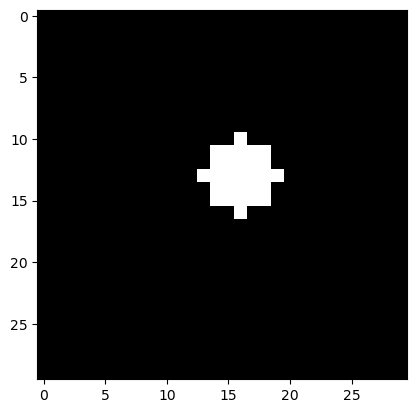

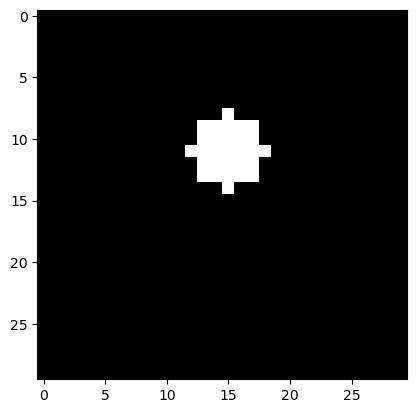

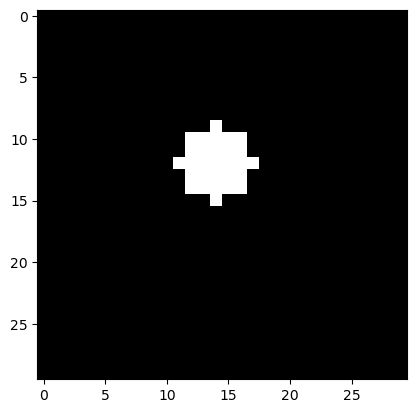

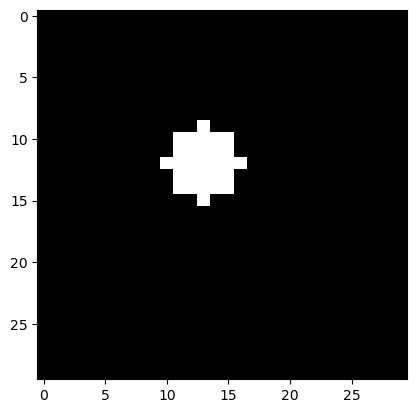

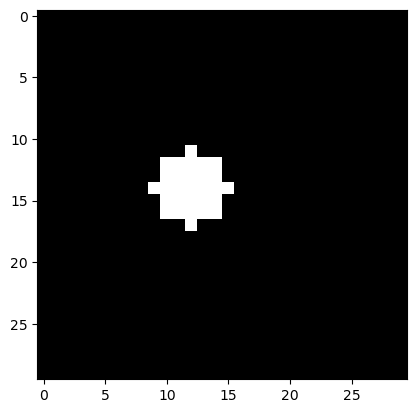

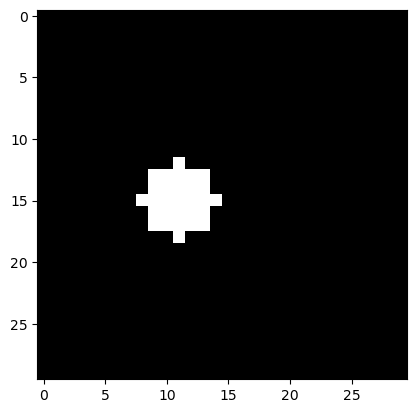

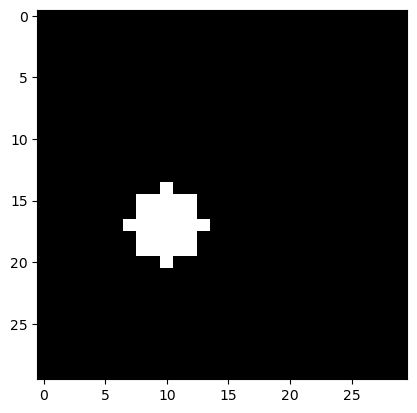

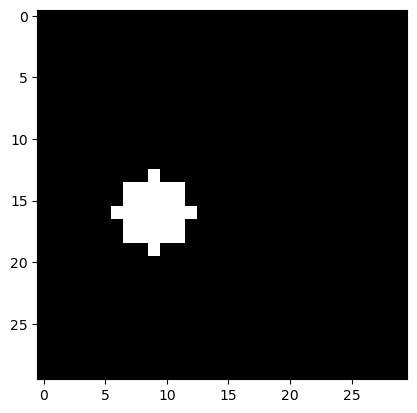

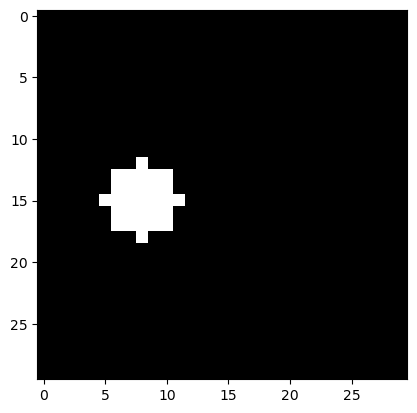

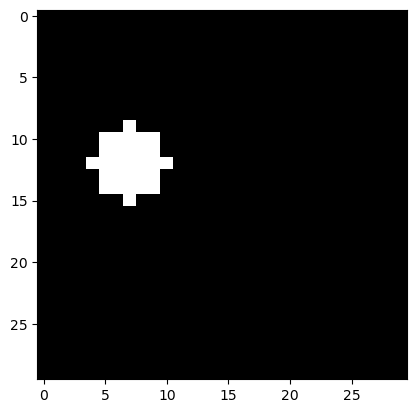

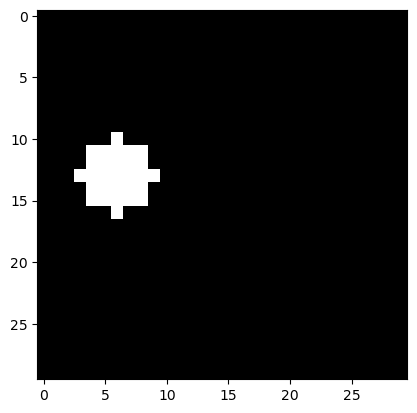

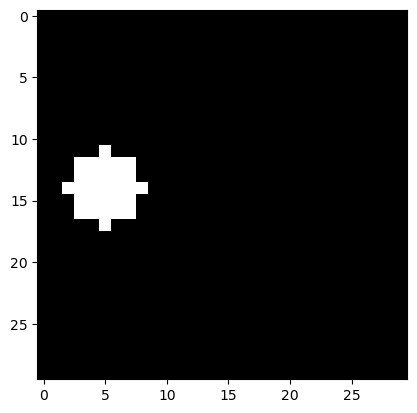

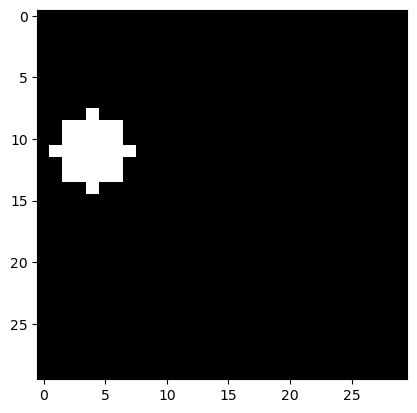

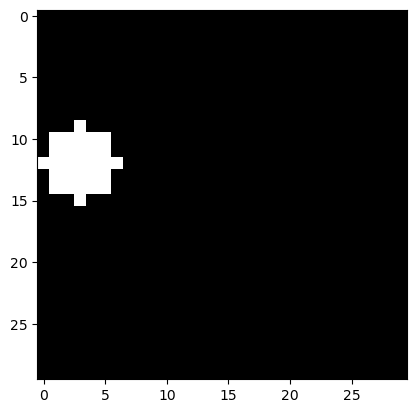

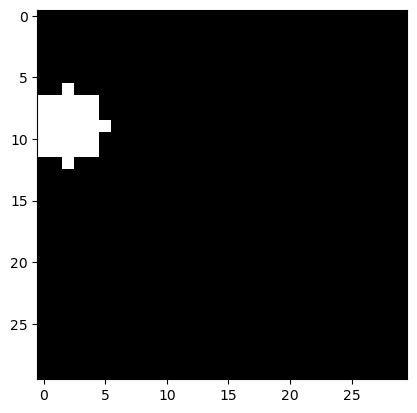

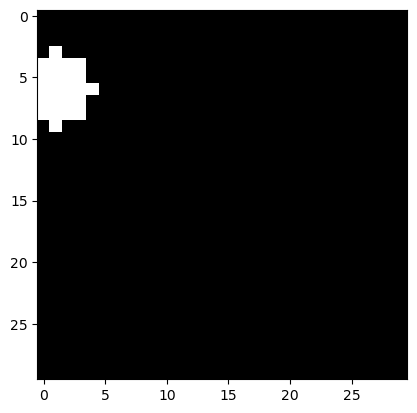

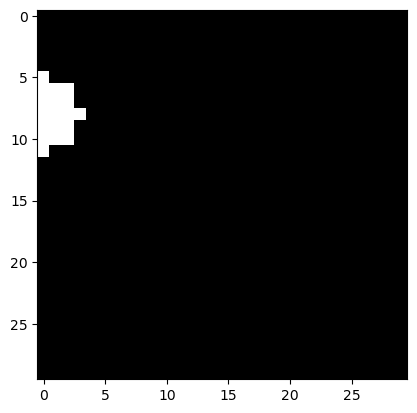

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

X, Y = generate_examples(size, 6) 
print("Right -->") if Y[0] else print("<-- Left")

for frame in X[0]:
    plt.imshow(frame[:,:,0], cmap="gray")
    plt.show()

In [13]:
# define the model 
model = Sequential() 
model.add(TimeDistributed(Conv2D(2, (3,3), activation='relu'), 
                          input_shape=(None,size,size,1))) 
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2)))) 
model.add(TimeDistributed(Flatten())) 
model.add(LSTM(50)) 
model.add(Dense(1, activation='sigmoid')) 
print(model.summary())

D:\Anaconda\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, None, 28, 28, 2)     │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, None, 14, 14, 2)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, None, 392)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          88,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,671 (346.37 KB)

 Trainable params: 88,671 (346.37 KB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 

In [21]:
# fit model 
X, y = generate_examples(size, 1000) A
model.fit(X, y, batch_size=32, epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - acc: 1.0000 - loss: 0.0441
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - acc: 1.0000 - loss: 0.0126
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - acc: 1.0000 - loss: 0.0069
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - acc: 1.0000 - loss: 0.0045
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - acc: 1.0000 - loss: 0.0033
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - acc: 1.0000 - loss: 0.0025
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - acc: 1.0000 - loss: 0.0018
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - acc: 1.0000 - loss: 0.0015
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - acc: 1.0000 - loss: 0.0012
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - acc: 1.0000 - loss: 0.0011
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - acc: 1.0000 - loss: 9.5728e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - acc: 1.0000 - loss: 8.5918e-04
Epoch 13/50
32/32 ━━━━━━━━━━━

In [35]:
# evaluate model 
X, y = generate_examples(size, 100) 
loss, acc = model.evaluate(X, y, verbose=0) 
print('loss: %f, acc: %f' % (loss, acc*100))

loss: 0.000104, acc: 100.000000


In [37]:
# prediction on new data 
X, y = generate_examples(size, 1) 
yhat = model.predict(X, verbose=0) 
expected = "Right" if y[0]==1 else "Left" 
predicted = "Right" if yhat[0]==1 else "Left" 
print('Expected: %s, Predicted: %s' % (expected, predicted))

Expected: Left, Predicted: Left
